In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# CONSTANTES
n = 32 # Taille de l'image
N = 4 # Nombre d'image
k = 26 # Nombre de lettre a reconnaitre

# Fonction qui importe une image, la redimenssionne et la binarize
def impIm(lettre,num):
    im = np.array(Image.open("sources/%s%d.png" % (lettre,num)).resize((n,n)))
    th = 128
    im_bool = (im < th) 

    # Passage de matrice RGB a matrice 2D
    matx = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if im_bool[i,j,0]:
                matx[i,j] = 1
            else:
                matx[i,j] = 0
    return matx

# Fonction d'apprentissage machine, elle fait ressortir les zone les plus occupe d'une matrice
def learn(mat):
    for i in range(n):
        for j in range(n):
            if mat[i,j] == 1:
                mat[i,j] += 1
            else:
                mat[i,j] += -1
    return mat

[[-4. -4. -4. ... -4. -4. -4.]
 [-4. -4. -4. ... -4. -4. -4.]
 [-4. -4. -4. ... -4. -4. -4.]
 ...
 [-1.  8.  8. ...  2. -1. -4.]
 [ 2.  8.  8. ...  5. -1. -1.]
 [ 5.  5.  2. ...  5. -1. -1.]]


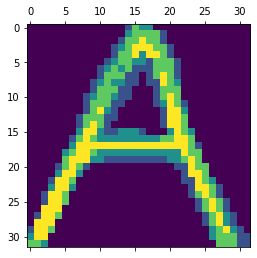

In [2]:
# On construit la matrice de poid W pour la lettre A
W = np.zeros((32,32))
for i in range(N):
    W += learn(impIm('A',i))
    
plt.matshow(W)
print(W)

Q =  0.8944487881157154
Temps d'execution du programme: 0.03270840644836426 s


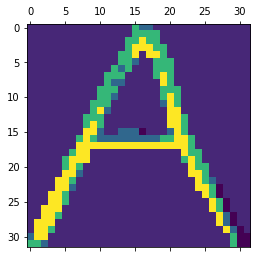

In [11]:
# SCORE CANDIDAT
I = impIm('A',0)
phi = W*I
plt.matshow(phi)

# SCORE IDEAL POID-MODEL
mu = 0
for i in range(n):
    for j in range(n):
        if W[i,j]> 0:
            mu += W[i,j]

# QUOTIENT DE RECONNAISSANCE
Q = phi/mu
print("Q = ",abs(Q.sum()))

In [4]:
alphabet = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

I = impIm('test',0)

Wk = np.zeros((k,n,n))
for i in range(k):
    for j in range(N):
        Wk[i] += learn(impIm(alphabet[i],j))
        
phik = np.zeros((k,n,n))
for i in range(k):
    phik[i] = Wk[i]*I

muk = np.zeros(k)
for i in range(k):
    for i in range(k):
        for j in range(n):
            for l in range(n):
                muk[i] += Wk[i,j,l]

Qk = np.zeros(k)
for i in range(k):
    Qk[i] = phik[i]/muk[i]

Wk[0] = np.ones(n)
print(Wk)

FileNotFoundError: [Errno 2] No such file or directory: 'sources/test0.png'